***GAUSSIAN QUADRATURE : GENERAL CASE***

**PART I. Theory**

**PART II. Implementation**

In [2]:
from scipy.special import roots_legendre
from scipy.special import roots_laguerre
from scipy.special import roots_hermite
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import timeit

*8.*

We should apply the function $\psi$ s.t $\Psi(x) = \frac{b-a}{2}x+\frac{b+a}{2}$

*9.*

In [3]:
def gauss_legendre_simple(f, a, b, nodes, weights):
    return sum([weights[i] * f((b - a) / 2 * nodes[i] + (a + b) / 2) for i in range(len(nodes))]) * (b - a) / 2

In [4]:
#Test of the gauss_legendre_simple function
f = lambda x: np.exp(x)
a = -1
b = 1
nodes, weights = roots_legendre(2)

print(gauss_legendre_simple(f, a, b, nodes, weights))
print(np.exp(1) - np.exp(-1))

2.3426960879097307
2.3504023872876028


*10.*

In [5]:
def gauss_legendre(f, n, M, a, b):
    nodes, weights = roots_legendre(n)
    result = 0
    for i in range(M):
        result += gauss_legendre_simple(f, a+i*(b-a)/M, a+(i+1)*(b-a)/M, nodes, weights)
    return result

In [6]:
#Test of the gauss_legendre function

f = lambda x: np.exp(x)

print(gauss_legendre(f, 3, 10, 0, 10))
print(np.exp(10) - 1)

22025.455231411797
22025.465794806718


*11.*

In order to vectorized our function, we create a matrix m*n where the i line contains the n nodes of the i QMS of the QMC

In [7]:
def gauss_legendre_vectorized(f, n, M, a, b):
    nodes, weights = roots_legendre(n)
    dx = (b - a) / M
    subinterval_a = np.linspace(a, b - dx, M)
    subinterval_b = subinterval_a + dx
    x_mapped = 0.5 * (subinterval_b[:, np.newaxis] - subinterval_a[:, np.newaxis]) * nodes \
            + 0.5 * (subinterval_b[:, np.newaxis] + subinterval_a[:, np.newaxis])
    integral = np.sum(weights * f(x_mapped), axis=1) * 0.5 * dx
    return np.sum(integral)

    

In [8]:
print(gauss_legendre_vectorized(f, 3, 10, 0, 10))

22025.455231411797


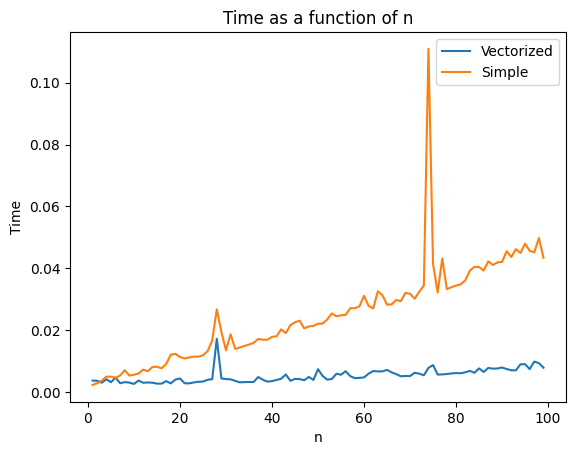

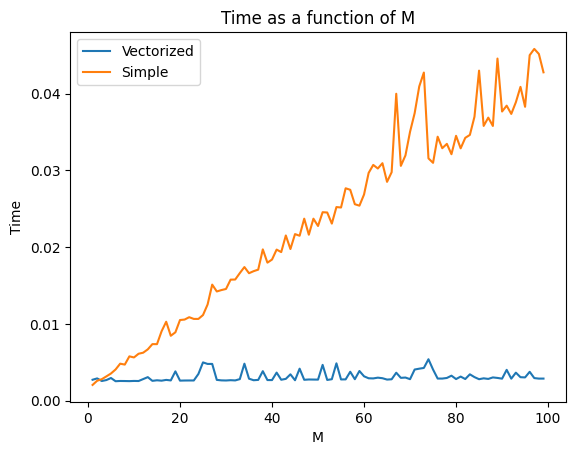

In [9]:
#Speed test
n=100
M=100

f = lambda x: np.exp(x)

vectorizer_speed_n = []
vectorizer_speed_M = []
simple_speed_n = []
simple_speed_M = []
for i in range(1, n):
    vectorizer_speed_n.append(timeit.timeit(lambda: gauss_legendre_vectorized(f, i, 10, 0, 10), number=10))
    simple_speed_n.append(timeit.timeit(lambda: gauss_legendre(f, i, 10, 0, 10),number=10))

for i in range(1, M):
    vectorizer_speed_M.append(timeit.timeit(lambda: gauss_legendre_vectorized(f, 10, i, 0, 10),number=10))
    simple_speed_M.append(timeit.timeit(lambda: gauss_legendre(f, 10, i, 0, 10),number=10))

plt.plot(range(1, n), vectorizer_speed_n, label="Vectorized")
plt.plot(range(1, n), simple_speed_n, label="Simple")
plt.xlabel("n")
plt.ylabel("Time")
plt.title("Time as a function of n")
plt.legend()
plt.show()

plt.plot(range(1, M), vectorizer_speed_M, label="Vectorized")
plt.plot(range(1, M), simple_speed_M, label="Simple")
plt.xlabel("M")
plt.ylabel("Time")
plt.title("Time as a function of M")
plt.legend()
plt.show()

The vectorized method is way faster, we have a better time complexity, but the space complexity is bigger.

*12.*

<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Witt\AppData\Local\Temp\ipykernel_14924\763144081.py:23: SyntaxWarning: invalid escape sequence '\i'
  ax.set_title('Integration Error of $\int_{2}^{5}1/x$')


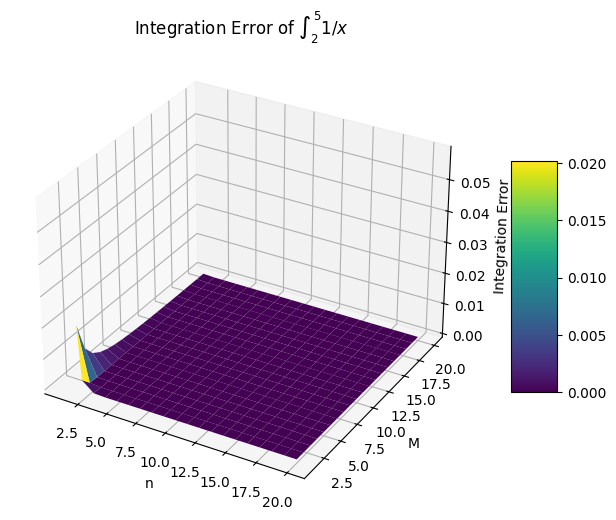

In [26]:
result = np.log(5/2)

f = lambda x: 1/x
a=2
b=5

n,m=20,20

errors = np.zeros((m,n))


for i in range(m):
    for j in range(n):
        errors[i,j] = np.abs(gauss_legendre_vectorized(f, j+1, i+1, a, b)-result)

N, M = np.meshgrid(range(1,n+1), range(1,m+1))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(N, M, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('M')
ax.set_zlabel('Integration Error')
ax.set_title('Integration Error of $\int_{2}^{5}1/x$')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

The absolute error converges really fast to zero

*13.*

<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Witt\AppData\Local\Temp\ipykernel_14924\208365463.py:14: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Integration Error of $\int_{2}^{5} 1/x$')


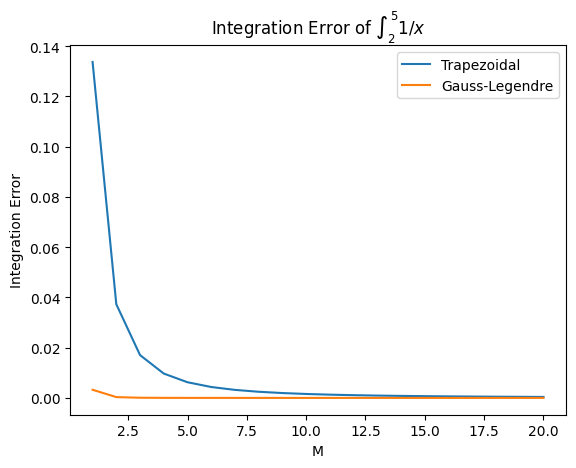

In [11]:
def trapzoide(f, M, a, b):
    result = 0
    dx=(b-a)/M
    for i in range(M):
        result += (f(a+i*dx)+f(a+(i+1)*dx))/2*dx
    return result  


x=range(1, 21)
errors_trap=[np.abs(trapzoide(f, i, 2, 5)-result) for i in x]
errors_gauss=[np.abs(gauss_legendre_vectorized(f, 2, i, 2, 5)-result) for i in x]
plt.plot(x,errors_trap, label='Trapezoidal')
plt.plot(x,errors_gauss, label='Gauss-Legendre')
plt.title('Integration Error of $\int_{2}^{5} 1/x$')
plt.xlabel('M')
plt.ylabel('Integration Error')
plt.legend()
plt.show()



The Gauss-legendre method is way more efficent than the trapezoidal method. And it confirm that the error converges fast to zero with the Gauss-legendre method.

*14.*

**Legendre roots**

We can't integrate the density from $-\infty$ to $a$, so we will compute this integral from $-5$ to $a$.
We make a slight approximation, but our error is less than $10^{-6}$, which is greater than $\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{-5} e^{-\frac{t^2}{2}} dt$.

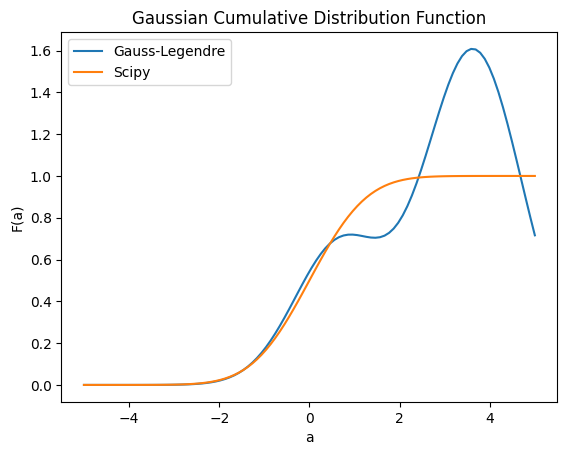

In [20]:
#Legendre polynomials
gaussian_distr = lambda x: np.exp(-(x**2)/2)/np.sqrt(2*np.pi)
x=np.linspace(-5,5,100)
y=[gauss_legendre_vectorized(gaussian_distr, 10, 1, -50, i) for i in x]
plt.plot(x,y, label='Gauss-Legendre')
plt.plot(x,norm.cdf(x), label='Scipy')
plt.title('Gaussian Cumulative Distribution Function')
plt.xlabel('a')
plt.ylabel('F(a)')
plt.legend()
plt.show()

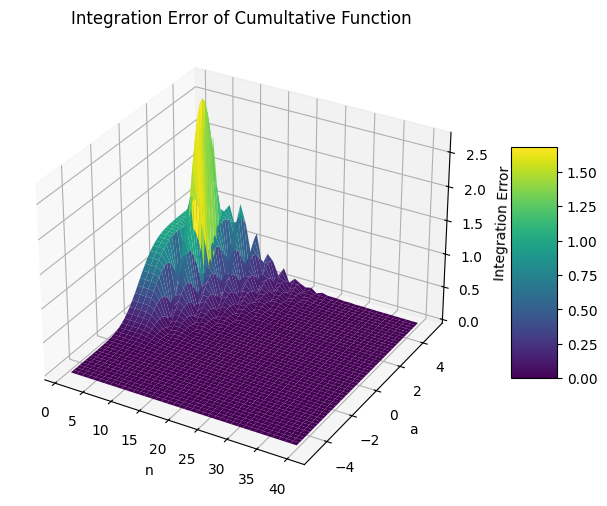

In [24]:
n=40
x=np.linspace(-5,5,50)
errors = np.zeros((n,50))

for i in range(n):
    for j in range(50):
        errors[i,j] = np.abs(gauss_legendre_vectorized(gaussian_distr, i+1, 1, -50, x[j])-norm.cdf(x[j]))

N, X = np.meshgrid(x, range(1,n+1))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, N, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('a')
ax.set_zlabel('Integration Error')
ax.set_title('Integration Error of Cumultative Function')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

This method makes errors for big $a$ when $n$ is low, but for $n$ bigger than $20$ in works for all $a$ in $[-5;5]$.

**Hermite roots**

The weights function already correspond to the gaussian density, so we integrate a door $(-\infty;a]$.

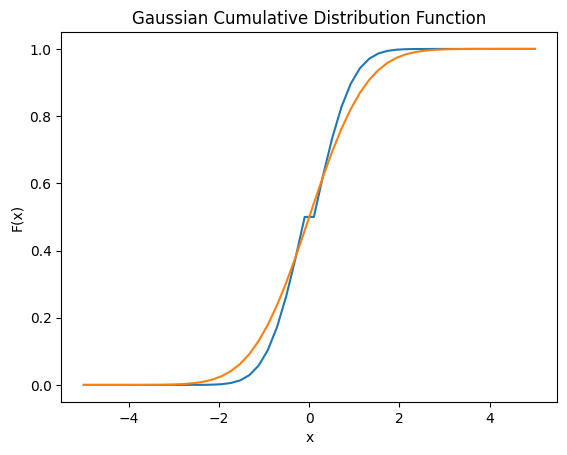

In [14]:
#Hermite polynomials

def gauss_hermite(f, n):
    nodes, weights = roots_hermite(n)
    return np.sum([weights[i] * f(nodes[i]) for i in range(len(nodes))])/np.sqrt(np.pi)

def door(x,a):
    if x<a:
        return 1
    else:
        return 0
    
x=np.linspace(-5,5,50)
y=[gauss_hermite(lambda x:door(x,i), 100) for i in x]
plt.plot(x,y, label='Gauss-Hermite')
plt.plot(x,norm.cdf(x), label='Scipy')
plt.title('Gaussian Cumulative Distribution Function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()


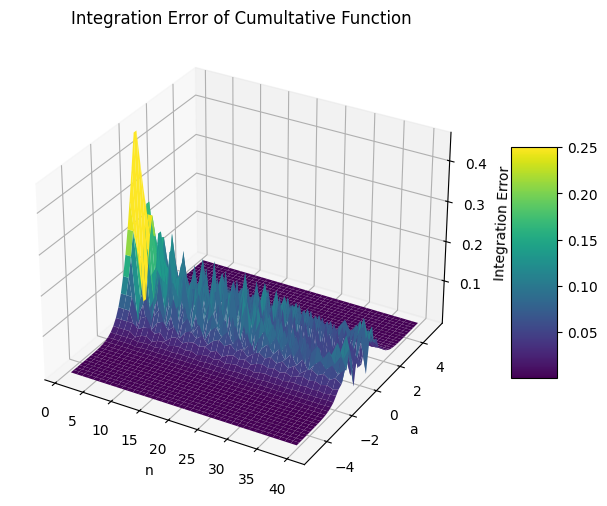

In [21]:
n=40
x=np.linspace(-5,5,50)
errors = np.zeros((n,50))

for i in range(n):
    for j in range(50):
        errors[i,j] = np.abs(gauss_hermite(lambda u:door(u,x[j]), i+1)-norm.cdf(x[j]))

N, X = np.meshgrid(x, range(1,n+1))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, N, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('a')
ax.set_zlabel('Integration Error')
ax.set_title('Integration Error of Cumultative Function')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

There is a big error centered around 0, the reason is that if we take an even number of nodes, we don't have a node at the center. 
Moreover the error is even bigger because as it's around the center that the density is high, we need the nodes to be close to zero, but this methods use nodes far from zero, were the density is small.
Let's plot the same graph but only with an odd number of nodes:

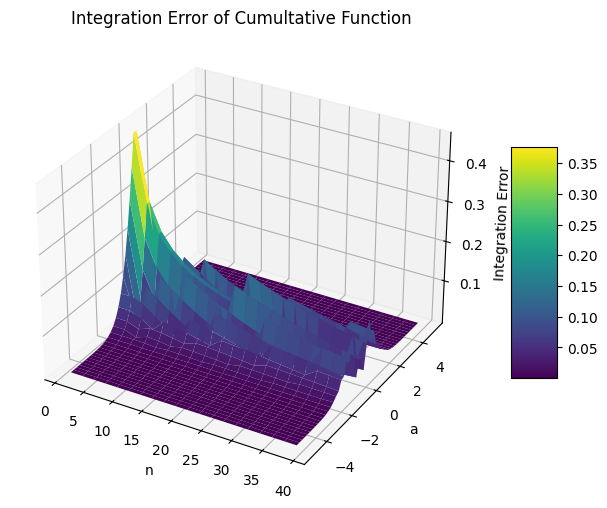

In [22]:
n=40
x=np.linspace(-5,5,50)
errors = np.zeros((int(n/2),50))


for i in range(int(n/2)):
    for j in range(50):
        errors[i,j] = np.abs(gauss_hermite(lambda u:door(u,x[j]), 2*i+1)-norm.cdf(x[j]))
N, X = np.meshgrid(x, np.arange(1,n,2))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, N, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('a')
ax.set_zlabel('Integration Error')
ax.set_title('Integration Error of Cumultative Function')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

It's a little bit better, but we still have some big errors arround zero.

**Laguerre roots**

For this method, we make a change of variable in order to find the integral we want.

$\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{a} e^{-\frac{t^2}{2}} dt=\frac{1}{\sqrt{2\pi}} \int_{0}^{+\infty} e^{-\frac{(t-a)^2}{2}} dt = \frac{1}{\sqrt{2\pi}} \int_{0}^{+\infty} e^{-\frac{(t-a)^2}{2}+t}e^{-t} dt$

So the function we integrate is $f(x,a) =\frac{1}{\sqrt{2\pi}} e^{-\frac{(t-a)^2}{2}+t}$

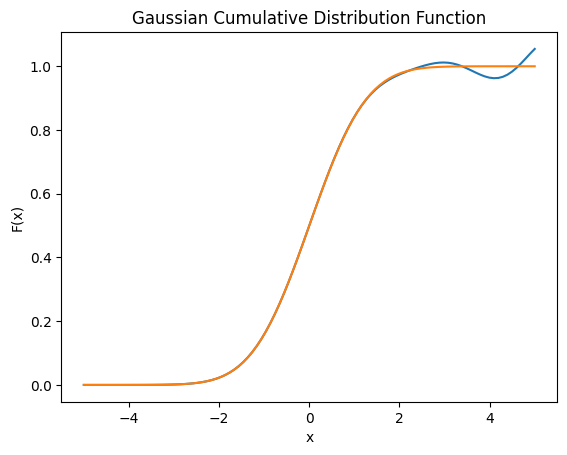

In [17]:
#laguerre polynomials

def gauss_laguerre(f, n):
    nodes, weights = roots_laguerre(n)
    return np.sum(weights * f(nodes) )

def gaussian_distr_for_laguerre(x,a):
    return np.exp(-((x-a)**2)/2 + x)/np.sqrt(2*np.pi)

x=np.linspace(-5,5,100)
y=[gauss_laguerre(lambda x:gaussian_distr_for_laguerre(x,i), 10) for i in x]
plt.plot(x,y, label='Gauss-Laguerre')
plt.plot(x,norm.cdf(x), label='Scipy')
plt.title('Gaussian Cumulative Distribution Function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

    

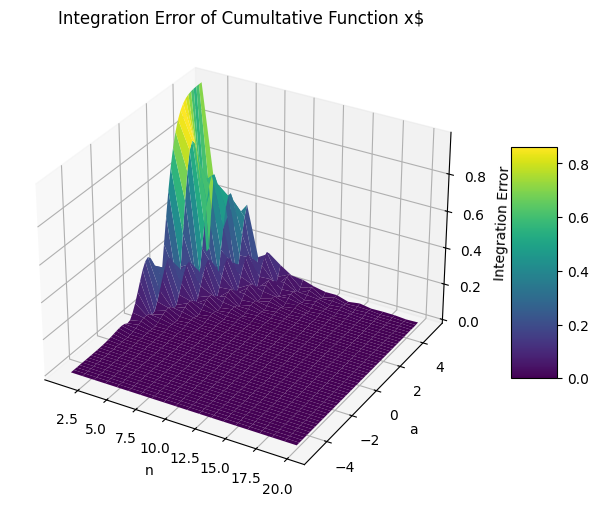

In [18]:
n=20
x=np.linspace(-5,5,50)
errors = np.zeros((n,50))

for i in range(n):
    for j in range(50):
        errors[i,j] = np.abs(gauss_laguerre(lambda a:gaussian_distr_for_laguerre(a,x[j]), i+1)-norm.cdf(x[j]))

N, X = np.meshgrid(x, range(1,n+1))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, N, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('a')
ax.set_zlabel('Integration Error')
ax.set_title('Integration Error of Cumultative Function x$')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

This method is the best one, as the Legendre method. It makes errors for large $a$ when $n$ is smaller than $10$, but when $n$ is higher than $10$, it gives great results for $a$ in $[-5;5]$.